In [2]:
import xarray as xr
import cartopy.crs as ccrs
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path
home = str(Path.home())
import sys
sys.path.append(home+"/my_utils/src/")
from plot import contour

In [6]:
ds = xr.open_dataset("/global/homes/w/wlin/pe3sm/data/MERRA2/MERRA2.tavgM_2d_slv_ANN_climo.1985_2015.nc")

In [8]:
ds = xr.open_dataset("/global/homes/z/zhangtao/tmp/tmp/ML_trigger/calc_cape/scam_offline/Arm_CF_1999_2009_uniform.nc")
ds = xr.open_dataset("/global/homes/z/zhangtao/tmp/tmp/ML_trigger/calc_cape/scam_offline/goamazon_2014_2015.nc")

ds = xr.open_dataset("/global/homes/z/zhangtao/ML_trigger/ML/data/TWP06_4scam_uniform.nc")

/global/cfs/projectdirs/m2136/backup/conda/envs/dushu/lib/python3.11/site-packages/xarray/conventions.py:551: SerializationWarning: variable 'T' has multiple fill values {-8888.0, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/global/cfs/projectdirs/m2136/backup/conda/envs/dushu/lib/python3.11/site-packages/xarray/conventions.py:551: SerializationWarning: variable 'T_adv_h' has multiple fill values {-8888.0, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/global/cfs/projectdirs/m2136/backup/conda/envs/dushu/lib/python3.11/site-packages/xarray/conventions.py:551: SerializationWarning: variable 'T_adv_v' has multiple fill values {-8888.0, -9999.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/global/cfs/projectdirs/m2136/backup/conda/envs/dushu/lib/python3.11/site-packages/xarray/conventions.py:551: SerializationWarning: variable 'p_srf_aver' has multiple fill values {-8888.0, -9999.0}, decoding all values to NaN.

In [22]:
ds['time'][70:160]

<xarray.DataArray 'time' (time: 90)>
array([20060118.097222, 20060118.111111, 20060118.125   , 20060118.138889,
       20060118.152778, 20060118.166667, 20060118.180556, 20060118.194444,
       20060118.208333, 20060118.222222, 20060118.236111, 20060118.25    ,
       20060118.263889, 20060118.277778, 20060118.291667, 20060118.305556,
       20060118.319444, 20060118.333333, 20060118.347222, 20060118.361111,
       20060118.375   , 20060118.388889, 20060118.402778, 20060118.416667,
       20060118.430556, 20060118.444444, 20060118.458333, 20060118.472222,
       20060118.486111, 20060118.5     , 20060118.513889, 20060118.527778,
       20060118.541667, 20060118.555556, 20060118.569444, 20060118.583333,
       20060118.597222, 20060118.611111, 20060118.625   , 20060118.638889,
       20060118.652778, 20060118.666667, 20060118.680556, 20060118.694444,
       20060118.708333, 20060118.722222, 20060118.736111, 20060118.75    ,
       20060118.763889, 20060118.777778, 20060118.791667, 20060118.805556,
       20060118.819444, 20060118.833333, 20060118.847222, 20060118.861111,
       20060118.875   , 20060118.888889, 20060118.902778, 20060118.916667,
       20060118.930556, 20060118.944444, 20060118.958333, 20060118.972222,
       20060118.986111, 20060119.      , 20060119.013889, 20060119.027778,
       20060119.041667, 20060119.055556, 20060119.069444, 20060119.083333,
       20060119.097222, 20060119.111111, 20060119.125   , 20060119.138889,
       20060119.152778, 20060119.166667, 20060119.180556, 20060119.194444,
       20060119.208333, 20060119.222222, 20060119.236111, 20060119.25    ,
       20060119.263889, 20060119.277778, 20060119.291667, 20060119.305556,
       20060119.319444, 20060119.333333])
Coordinates:
  * time     (time) float64 2.006e+07 2.006e+07 ... 2.006e+07 2.006e+07
Attributes:
    units:     day as %Y%m%d.%f
    calendar:  proleptic_gregorian

In [14]:
tas = ds['T2M'][0,:,:]-273.15
crange = np.arange(-35,35.01,1)
lat_rgns = [-90, 90]
lon_rgns = [0, 360]
lat = ds['lat']
lon = ds['lon']

print(tas.shape)

(361, 576)


(<Figure size 1100x850 with 2 Axes>,
 <GeoAxesSubplot: title={'center': '2M Air Temperature'}>)

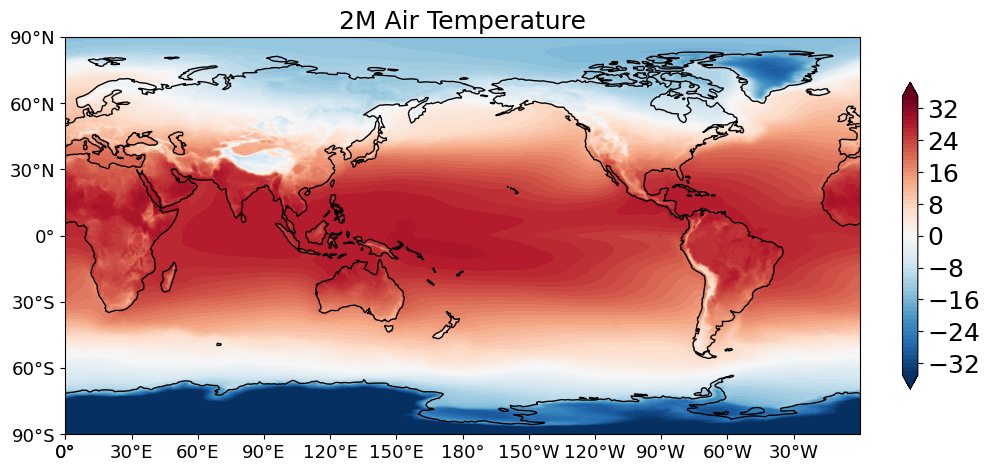

In [15]:
fig, axes = plt.subplots(1,1,figsize=(11,8.5),subplot_kw={'projection':  ccrs.PlateCarree(180)},squeeze=False)
contour.plot_2d_contourf_PlateCarree(fig, axes[0][0], tas[:,:], lat, lon, lat_rgns, lon_rgns,
                                         "2M Air Temperature",'',crange,cmap="RdBu_r")
